In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Master:
    def __init__(self):
        self.out = 0

    def computeout(self,Hami,dm,decoop1,decoop2,decoop3,rate1,rate2,rate3):
        down1 = decoop1
        down2 = decoop2
        down3 = decoop3
        up1 = np.matrix(down1).getH()
        up2 = np.matrix(down2).getH()
        up3 = np.matrix(down3).getH()
        temp1 = (0-1j)*(np.dot(Hami, dm) - np.dot(dm, Hami))
        temp2 = 2*np.dot(np.dot(down1, dm), up1) - np.dot(np.dot(up1, down1), dm) -np.dot(np.dot(dm, up1), down1)
        temp3 = 2*np.dot(np.dot(down2, dm), up2) - np.dot(np.dot(up2, down2), dm) -np.dot(np.dot(dm, up2), down2)
        temp4 = 2*np.dot(np.dot(down3, dm), up3) - np.dot(np.dot(up3, down3), dm) -np.dot(np.dot(dm, up3), down3)
        out =  temp1 + (np.multiply(rate1, temp2) + np.multiply(rate2, temp3) + np.multiply(rate3, temp4))/2
        return out

In [3]:
class Ad(Master):
    # Adiabatic case
    def __init__(self):
        super().__init__()
        self.name = "Adiabatic"

    def ComputeOmega(self, Omega0, phi, Theta):
        OmegaS = np.sin(phi)*Omega0*np.sin(Theta)
        OmegaP = np.cos(phi)*Omega0*np.sin(Theta)
        OmegaA = Omega0*np.cos(Theta)
        return OmegaP, OmegaS, OmegaA

    def ComputeOmega2(self, Omega0, phi, Theta):
        OmegaS2=np.sin(phi)*Omega0*np.cos(Theta)
        OmegaP2=np.cos(phi)*Omega0*np.cos(Theta)
        OmegaA2=Omega0*np.sin(Theta)
        return OmegaP2, OmegaS2, OmegaA2

In [4]:
class SAd(Master):
    # SuperAdiabatic case
    def __init__(self):
        super().__init__()
        self.name = "SuperAdiabatic"

    def ComputeOmega(self, t, T, tau, Omega0, phi):
        OmegaP = np.sin(np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))) - np.arctan((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))))*np.cos(phi)*((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2 + Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)
        OmegaS = np.sin(np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))) - np.arctan((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))))*np.sin(phi)*((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2 + Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)
        OmegaA = np.cos(np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))) - np.arctan((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))))*((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2 + Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)
        return OmegaP, OmegaS, OmegaA

    def ComputeOmega2(self, t, T, tau, Omega0, phi):
        OmegaP2 = np.cos(np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))) - np.arctan((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))))*np.cos(phi)*((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2 + Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)
        OmegaS2 = np.cos(np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))) - np.arctan((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))))*np.sin(phi)*((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2 + Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)
        OmegaA2 = np.sin(np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))) - np.arctan((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))))*((((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - (((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2 + Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)
        return OmegaP2, OmegaS2, OmegaA2


In [5]:
class SAdFixed(Master):
    # SuperAdiabatic-Fixed case
    def __init__(self):
        super().__init__()
        self.name = "SuperAdiabaticFixed"

    def ComputeOmega(self, t, T, tau, Omega0, phi, A, N):
        OmegaP = np.sin(np.arctan(((((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - tau/2)**2/N**2)*(2*t - tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))) + np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))))*np.sin(phi)*((A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2) + ((((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - tau/2)**2/N**2)*(2*t - tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/((A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2)**(1/2)
        OmegaS = np.sin(np.arctan(((((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - tau/2)**2/N**2)*(2*t - tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))) + np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))))*np.cos(phi)*((A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2) + ((((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - tau/2)**2/N**2)*(2*t - tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/((A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2)**(1/2)
        OmegaA = np.cos(np.arctan(((((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - tau/2)**2/N**2)*(2*t - tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))) + np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))))*((A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2) + ((((Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - tau/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T**2*(np.exp(-(t - tau/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(np.exp(-(t - tau/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(2*(t - tau/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**3*(np.exp(-(t - tau/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - tau/2)**2/N**2)*(2*t - tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1))))/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - tau/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))*np.exp(-(t - tau/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*(np.exp(-(t - tau/2)/T) + 1)**2))**2/((A*np.exp(-(t - tau/2)**2/N**2) + 1)**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - tau/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2)**(1/2)
        return OmegaP, OmegaS, OmegaA
  
    def ComputeOmega2(self, t, T, tau, Omega0, phi, A, N):
        OmegaP2 = np.cos(np.arctan(((((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - (3*tau)/2)**2/N**2)*(2*t - 3*tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))) + np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))))*np.sin(phi)*((A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2) + ((((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - (3*tau)/2)**2/N**2)*(2*t - 3*tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/((A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2)**(1/2) 
        OmegaS2 = np.cos(np.arctan(((((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - (3*tau)/2)**2/N**2)*(2*t - 3*tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))) + np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))))*np.cos(phi)*((A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2) + ((((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - (3*tau)/2)**2/N**2)*(2*t - 3*tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/((A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2)**(1/2)
        OmegaA2 = np.sin(np.arctan(((((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - (3*tau)/2)**2/N**2)*(2*t - 3*tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))) + np.arctan((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)/(Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))))*((A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2) + ((((Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (Omega0**2*np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2)/(2*T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (2*Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/(4*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (np.pi**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(4*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) + (np.pi**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**4) - (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(2*(t - (3*tau)/2))/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(Omega0*T**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**3) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2))/(Omega0**2*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**3*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) - ((((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))*((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) - (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(3/2)) + (A*np.exp(-(t - (3*tau)/2)**2/N**2)*(2*t - 3*tau)*(((Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1))))/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2)))/(N**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)*(A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)))**2/((((Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.cos(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2) + (Omega0**2*np.pi*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*np.sin(phi)**2)/(T*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))/(2*Omega0*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2)) + (np.pi*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))*np.exp(-(t - (3*tau)/2)/T)*(Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)**(1/2))/(2*Omega0*T*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*(np.exp(-(t - (3*tau)/2)/T) + 1)**2))**2/((A*np.exp(-(t - (3*tau)/2)**2/N**2) + 1)**2*((Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)/(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2) + 1)**2*(Omega0**2*np.cos(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.cos(phi)**2 + Omega0**2*np.sin(np.pi/(2*(np.exp(-(t - (3*tau)/2)/T) + 1)))**2*np.sin(phi)**2)) + 1)**2)**(1/2)
        return OmegaP2, OmegaS2, OmegaA2


In [6]:
class PulseShape(Ad, SAd, SAdFixed):
    def __init__(self, gatename, methodname):
        super().__init__()
        self.FigClass = "PulseShape"
        self.gatename = gatename
        self.methodname = methodname

    def PulseShapePlot(self):
        Omega0 = 2*np.pi*1
        T0 = 1/2.63/Omega0
        T = 1*T0
        tau = 10*T
        #t=0*tau:0.001:2*tau;
        t = np.arange(0, 2*tau+1, 0.001)
        if self.gatename == "NOT":
            phi = 1*np.pi/4 
        elif self.gatename == "Hadamard":
            phi = 1*np.pi/8        #  pi/4: Not; pi/8: Hardamard
        M = np.pi
        N = 0.115
        A = 0.3675
        # Selection rules
        tmask1 = t<0
        tmask2 = (t>=0) & (t<1*tau)
        tmask3 = (t>=tau) & (t<=2*tau)
        tmask4 = t<T
        # Adiabatic
        Theta = np.pi/2/(1+np.exp(-(t-tau/2)/T))
        OmegaP, OmegaS, OmegaA = Ad.ComputeOmega(self, Omega0, phi, Theta)
        Theta2 = np.pi/2/(1+np.exp(-(t-3*tau/2)/T))
        OmegaP2, OmegaS2, OmegaA2 = Ad.ComputeOmega2(self, Omega0, phi, Theta2)
        y1 = 0*tmask1 + OmegaA*tmask2 + np.exp((0+1j)*M)*OmegaA2*tmask3
        y2 = 0*tmask1 + OmegaP*tmask2 + OmegaP2*tmask3
        y3 = 0*tmask1 + OmegaS*tmask2 + OmegaS2*tmask3
        OmegaAR=1*y1
        OmegaPR=1*y2
        OmegaSR=1*y3
        # Super Adiabatic
        OmegaPP, OmegaSS, OmegaAA = SAd.ComputeOmega(self, t, T, tau, Omega0, phi)
        OmegaPP2, OmegaSS2, OmegaAA2 = SAd.ComputeOmega2(self, t, T, tau, Omega0, phi)
        y4=0*tmask1 + OmegaAA*tmask2 + np.exp((0+1j)*M)*OmegaAA2*tmask3
        y5=0*tmask4 + OmegaPP*tmask2 + OmegaPP2*tmask3
        y6=0*tmask4 + OmegaSS*tmask2 + OmegaSS2*tmask3
        OmegaAR2=1*y4
        OmegaPR2=1*y5
        OmegaSR2=1*y6
        # Super Adiabatic - Fixed
        OmegaPPP, OmegaSSS, OmegaAAA = SAdFixed.ComputeOmega(self, t, T, tau, Omega0, phi, A, N)
        OmegaPPP2, OmegaSSS2, OmegaAAA2 = SAdFixed.ComputeOmega2(self, t, T, tau, Omega0, phi, A, N)
        y7 = 0*tmask1 + OmegaAAA*tmask2 + np.exp((0+1j)*M)*OmegaAAA2*tmask3
        y8 = 0*tmask4 + OmegaPPP*tmask2 + OmegaPPP2*tmask3
        y9 = 0*tmask4 + OmegaSSS*tmask2 + OmegaSSS2*tmask3
        OmegaAR3=1*y7
        OmegaPR3=1*y9
        OmegaSR3=1*y8
        # Plot Session
        if self.methodname == 'Ad':
            plt.plot(t/tau,OmegaSR/2/np.pi, color='k', linewidth = 2.5)
            plt.plot(t/tau,OmegaPR/2/np.pi, color='b', linewidth = 2.5)
            plt.plot(t/tau,OmegaAR/2/np.pi, color='r', linewidth = 2.5)
            plt.axis([0, 2, -1, 1])
            plt.xlabel('t/T', fontsize = 18)
            plt.ylabel('\Omega_{i}(t)/\Omega_{max}', fontsize = 18)
            plt.title('np.sine and Conp.sine')
            plt.legend(['\Omega_{0}(t)','\Omega_{1}(t)','\Omega_{2}(t)'])
            plt.show()
        elif self.methodname == 'SAd':
            plt.plot(t/tau, OmegaSR2/2/np.pi, color='k', linewidth = 2.5)
            plt.plot(t/tau, OmegaPR2/2/np.pi, color='b', linewidth = 2.5)
            plt.plot(t/tau ,OmegaAR2/2/np.pi, color='r', linewidth = 2.5)
            plt.axis([0, 2, -1, 1])
            plt.xlabel('t/\tau', fontsize = 18)
            plt.ylabel('\Omega_{a}/\Omega_{max}(2\pi)', fontsize = 18)
        elif self.methodname == 'SAdFixed':
            plt.plot(t/tau, OmegaSR3/2/np.pi, color='k', linewidth = 2.5)
            plt.plot(t/tau, OmegaPR3/2/np.pi, color='b', linewidth = 2.5)
            plt.plot(t/tau, OmegaAR3/2/np.pi, color='r', linewidth = 2.5)
            plt.axis([0, 2, -1, 1])
            plt.xlabel('t/\tau', fontsize = 18)
            plt.ylabel('\Omega_{a}/\Omega_{max}(2\pi)', fontsize = 18)
        else:
            print('Wrong method input!')

In [7]:
class QFidelity(SAdFixed):
    # This class describes the qubit-state fidelity dynamics of the quantum gates.
    # The NOT gate and the Hadamard gate are considered.
    # Figures are in correspondence with the Fig.2 (c) and (d) of the original paper.
    def __init__(self, gateclass, strategy):
        super().__init__()
        self.gateclass = gateclass
        self.strategy = strategy
        # Atom Pauli operators
        self.__identy = np.identity(4)
        self.__zerostate = np.array([[1], [0], [0], [0]])
        self.__onestate = np.array([[0], [1], [0], [0]])
        self.__twostate = np.array([[0], [0], [1], [0]])
        self.__estate = np.array([[0], [0], [0], [1]])
        self.__A0e = np.multiply(self.__zerostate, np.transpose(self.__estate))
        self.__Ae0 = np.multiply(self.__estate, np.transpose(self.__zerostate))
        self.__A1e = np.multiply(self.__onestate, np.transpose(self.__estate))
        self.__Ae1 = np.multiply(self.__estate, np.transpose(self.__onestate))
        self.__A2e = np.multiply(self.__twostate, np.transpose(self.__estate))
        self.__Ae2 = np.multiply(self.__estate, np.transpose(self.__twostate))
        self.__A00 = np.multiply(self.__zerostate, np.transpose(self.__zerostate))
        self.__A11 = np.multiply(self.__onestate, np.transpose(self.__onestate))
        self.__A22 = np.multiply(self.__twostate, np.transpose(self.__twostate))
        self.__Aee = np.multiply(self.__estate, np.transpose(self.__estate))
        self.__Gamma0 = self.__A0e + self.__A1e + self.__A2e
        self.__Gamma1 = self.__Aee - self.__A00 - self.__A11 - self.__A22
        self.__Gamma2 = np.zeros((4,4))
    
    def ComputeFidelity(self):
        # The NOT gate
        #
        # Different values under different gates and strategies
        if self.gateclass == "NOT":
            if self.strategy == "Msa":
                dotsPerPeriod = 1000
                kappa0 = 2*2.6*np.pi
                A = 0.3675*1
                phi = np.pi/4
            elif self.strategy == "Satd":
                dotsPerPeriod = 500
                kappa0 = 2*2.6*np.pi
                A = 0.3675*1
                phi = np.pi/4                
        elif self.gateclass == "Hardamard":
            if self.strategy == "Msa":
                dotsPerPeriod = 1000
                kappa0 = 2*2.6*np.pi
                A = 0.3675*0
                phi = np.pi/8                
            elif self.strategy == "Satd":
                dotsPerPeriod = 1000
                kappa0 = 2*2.6*np.pi*np.pi
                A = 0.3675*0
                phi = np.pi/8    
        # Maximum Rabi frequency
        Omega0 = 2*np.pi*750
        #phi = np.pi/4
        phi1 = np.pi/2
        # Decay parameter
        #kappa0 = 2*2.6*np.pi
        kappa1 = 1*kappa0
        kappa2 = 0
        # Initial state set-up
        intialstate = self.__zerostate
        initialdm = np.multiply(intialstate, np.matrix(intialstate).getH())
        dm1 = initialdm
        finalatomstate1 = self.__zerostate
        fidm1 = np.multiply(finalatomstate1, np.matrix(finalatomstate1).getH())
        finalatomstate2 = self.__estate
        fidm2 = np.multiply(finalatomstate2, np.matrix(finalatomstate2).getH())
        finalatomstate3 = self.__onestate
        fidm3 = np.multiply(finalatomstate3, np.matrix(finalatomstate3).getH())
        finalatomstate4 = self.__twostate
        fidm4 = np.multiply(finalatomstate4, np.matrix(finalatomstate4).getH())
        idealstate1 = np.cos(phi1)*self.__zerostate + np.sin(phi1)*self.__onestate
        idm = np.multiply(idealstate1, np.matrix(idealstate1).getH())
        idealstate1 = 1/np.sqrt(2)*(self.__zerostate - self.__onestate)
        idealstate2 = np.cos(phi1)*self.__zerostate + np.sin(phi1)*self.__onestate
        # number of points drawn per period
        #          
        '''
        if method == "Msa":
          dotsPerPeriod = 1000
        else:
          dotsPerPeriod = 500
        '''
        #
        numberOfPeriod = 2;
        # definition of time and step length
        T0 = 1/2.63/Omega0;
        T = 1.0*T0*1;
        tau = 10*T;
        # t = np.arange(0, 2*tau, 0.0001);
        M = np.pi;
        N = 0.115;
        #A = 0.3675*1;
        # Definition of time and step length
        timestep = tau/dotsPerPeriod; # Draw (dotsPerPeriod) dots in a period
        time = numberOfPeriod * dotsPerPeriod; # Draw (numberOfPeriod) periods
        # Record all states in 20000 steps  记录下20000步以内的所有的态 
        f0 = np.zeros(time)
        f1 = np.zeros(time)
        f2 = np.zeros(time)
        f3 = np.zeros(time)
        F1 = np.zeros(time)
        F2 = np.zeros(time)
        for n in range (0, time+1):
            t = (n-1)*timestep + 0.00001
            OmegaP, OmegaS, OmegaA = super().ComputeOmega(t, T, tau, Omega0, phi, A, N)
            OmegaP2, OmegaS2, OmegaA2 = super().ComputeOmega2(t, T, tau, Omega0, phi, A, N)
            y7=0*(t<0) + OmegaA*((t>=0) & (t<1*tau)) + np.exp((0+1j)*M)*OmegaA2*((t>=tau) & (t<=2*tau))
            y8=0*(t<T) + OmegaP*((t>=0) & (t<1*tau)) + OmegaP2*((t>=tau) & (t<=2*tau))
            y9=0*(t<T) + OmegaS*((t>=0) & (t<1*tau)) + OmegaS2*((t>=tau) & (t<=2*tau))
            OmegaAR3=1*y7
            OmegaPR3=1*y9
            OmegaSR3=1*y8
            Hamiltonian2 = np.multiply(OmegaSR3, (self.__Ae0 + self.__A0e)) + np.multiply(OmegaPR3, (self.__Ae1 + self.__A1e)) + np.multiply(OmegaAR3, (self.__Ae2 + self.__A2e))
            Hamiltonian1 = Hamiltonian2
            k1 = super().computeout(Hamiltonian1, dm1, self.__Gamma0, self.__Gamma1, self.__Gamma2, kappa0, kappa1, kappa2)
            k2 = super().computeout(Hamiltonian1, dm1+0.5*timestep*k1, self.__Gamma0, self.__Gamma1, self.__Gamma2, kappa0, kappa1, kappa2)
            k3 = super().computeout(Hamiltonian1, dm1+0.5*timestep*k2, self.__Gamma0, self.__Gamma1, self.__Gamma2, kappa0, kappa1, kappa2)
            k4 = super().computeout(Hamiltonian1, dm1+timestep*k3, self.__Gamma0, self.__Gamma1, self.__Gamma2, kappa0, kappa1, kappa2)
            dm1 = dm1+(timestep/6)*(k1+2*k2+2*k3+k4)
            dm1 = 0.5*(dm1 + np.matrix(dm1).getH())
            dm1 = dm1/(np.trace(dm1))
            rho = dm1
            f0[n-1] = np.real(np.trace(np.multiply(rho, fidm1)))
            f1[n-1] = np.real(np.trace(np.multiply(rho, fidm2)))
            f2[n-1] = np.real(np.trace(np.multiply(rho, fidm3)))
            f3[n-1] = np.real(np.trace(np.multiply(rho, fidm4)))
            F1[n-1] = np.real(np.dot(np.dot(np.matrix(idealstate1).getH(), rho), idealstate1)[0,0])
            F2[n-1] = np.real(np.dot(np.dot(np.matrix(idealstate1).getH(), rho), idealstate1)[0,0])
            #F1.append(np.multiply(np.multiply(np.matrix(idealstate1).getH(), rho), idealstate1))
            #F2.append(np.multiply(np.multiply(np.matrix(idealstate2).getH(), rho), idealstate2))        
        n = np.arange(1, time+1, 1)
        # plot session
        # v=1*n/dotsPerPeriod*tau/T*Omega0;
        v=n/dotsPerPeriod*tau*Omega0/np.pi/2
        # figure(1)
        # plot(v,f0,'-blue',v,f2,'r',v,f3,'M',v,f1,'g',v,F2,'K','LineWidth',3);
        # legend('|0\rangle','|1\rangle','|2\rangle','|e\rangle','Fidelity');
        # set(gca,'FontSize',14);
        # %axis([0 1 0 1])
        # xlabel('\Omega_{0}t/2\pi','fontsize',14);
        # ylabel('Population','fontsize',14);
        plt.plot(v, f0, color='b', linewidth=3, label='|0>')
        plt.plot(v, f2, color='r', linewidth=3, label='|1>')
        plt.plot(v, f3, color='m', linewidth=3, label='|2>')
        plt.plot(v, f1, color='g', linewidth=3, label='|e>')
        if self.gateclass == 'Not':
            plt.plot(v, F2, color='k', linewidth=3, label='Fidelity')
        elif self.gateclass == 'Hardamard':
            plt.plot(v, F1, color='k', linewidth=3, label='Fidelity')
        # plt.legend('|0\rangle','|1\rangle','|2\rangle','|e\rangle','Fidelity');
        plt.legend(loc="upper right", frameon=True)
        # set(gca,'FontSize',14);
        # axis([0 1 0 1])
        plt.xlabel('\Omega_{0}t/2\pi', fontsize = 14);
        plt.ylabel('Population',fontsize = 14);
        plt.show()
    
    '''
    def Hadamard(self):
        # The Hadamard gate
        #
        method = input("Please input the method - Msa or Satd: ")
        # Maximum Rabi frequency
        Omega0 = 2*np.pi*750
        phi = np.pi/8
        phi1 = np.pi/2
        # Decay parameter
        if method == "Msa":
          kappa0 = 2*np.pi*2.6
        elif method == "Satd":
          kappa0 = 2*np.pi*2.6*np.pi
        else:
          print("Wrong method input.")
        kappa1 = 1*kappa0
        kappa2 = 0
        # Initial state set-up
        intialstate = self.__zerostate
        initialdm = np.multiply(intialstate, np.matrix(intialstate).getH())
        dm1 = initialdm
        finalatomstate1 = self.__zerostate
        fidm1 = np.multiply(finalatomstate1, np.matrix(finalatomstate1).getH())
        finalatomstate2 = self.__estate
        fidm2 = np.multiply(finalatomstate2, np.matrix(finalatomstate2).getH())
        finalatomstate3 = self.__onestate
        fidm3 = np.multiply(finalatomstate3, np.matrix(finalatomstate3).getH())
        finalatomstate4 = self.__twostate
        fidm4 = np.multiply(finalatomstate4, np.matrix(finalatomstate4).getH())
        idealstate1 = np.cos(phi1)*self.__zerostate + np.sin(phi1)*self.__onestate
        idm = np.multiply(idealstate1, np.matrix(idealstate1).getH())
        idealstate1 = 1/np.sqrt(2)*(self.__zerostate - self.__onestate)
        idealstate2 = np.cos(phi1)*self.__zerostate + np.sin(phi1)*self.__onestate
        # number of points drawn per period
        dotsPerPeriod = 500
        numberOfPeriod = 2
        # definition of time and step length
        T0 = 1/2.63/Omega0
        T = 1.0*T0*1
        tau = 10*T
        t = np.arange(0, 2*tau, 0.0001)
        M = np.pi
        N = 0.115
        A = 0.3675*0
        # Definition of time and step length
        timestep = tau/dotsPerPeriod # Draw (dotsPerPeriod) dots in a period
        time = numberOfPeriod * dotsPerPeriod # Draw (numberOfPeriod) periods
        # Record all states in 20000 steps  记录下20000步以内的所有的态
        f0 = []
        f1 = []
        f2 = []
        f3 = []
        F1 = []
        F2 = []
        for n in range (1, time):
            t = (n-1)*timestep + 0.00001
            SAdFixed.ComputeOmega(t, T, tau, Omega0, phi, A, N)
            SAdFixed.ComputeOmega2(t, T, tau, Omega0, phi, A, N)
            y7 = 0*(t<0) + self.OmegaA*((t>=0) & (t<1*tau)) + np.exp((0+1j)*M)*self.OmegaA2*((t>=tau) & (t<=2*tau))
            y8 = 0*(t<T) + self.OmegaP*((t>=0) & (t<1*tau)) + self.OmegaP2*((t>=tau) & (t<=2*tau))
            y9 = 0*(t<T) + self.OmegaS*((t>=0) & (t<1*tau)) + self.OmegaS2*((t>=tau) & (t<=2*tau))
            OmegaAR3 = 1*y7
            OmegaPR3 = 1*y9
            OmegaSR3 = 1*y8
            Hamiltonian2 = np.multiply(OmegaSR3, (self.__Ae0 + self.__A0e)) + np.multiply(OmegaPR3, (self.__Ae1 + self.__A1e)) + np.multiply(OmegaAR3, (self.__Ae2 + self.__A2e))
            Hamiltonian1 = Hamiltonian2
            super().computeout(Hamiltonian1, dm1, self.__Gamma0, self.__Gamma1, self.__Gamma2, kappa0, kappa1, kappa2)
            k1 = self.out
            super().computeout(Hamiltonian1, dm1+0.5*timestep*k1, self.__Gamma0, self.__Gamma1, self.__Gamma2, kappa0, kappa1, kappa2)
            k2 = self.out
            super().computeout(Hamiltonian1, dm1+0.5*timestep*k2, self.__Gamma0, self.__Gamma1, self.__Gamma2, kappa0, kappa1, kappa2)
            k3 = self.out
            super().computeout(Hamiltonian1, dm1+timestep*k3, self.__Gamma0, self.__Gamma1, self.__Gamma2, kappa0, kappa1, kappa2)
            k4 = self.out
            dm1 = dm1+(timestep/6)*(k1+2*k2+2*k3+k4)
            dm1 = 0.5*(dm1+np.matrix(dm1).getH())
            dm1 = dm1/(np.trace(dm1))
            rho = dm1;
            f0[n-1] = np.trace(np.dot(rho, fidm1))
            f1[n-1] = np.trace(np.dot(rho, fidm2))
            f2[n-1] = np.trace(np.dot(rho, fidm3))
            f3[n-1] = np.trace(np.dot(rho, fidm4))
            F1[n-1] = np.dot(np.dot(np.matrix(idealstate1).getH(), rho), idealstate1)[0,0]
            F2[n-1] = np.dot(np.dot(np.matrix(idealstate2).getH(), rho), idealstate2)[0,0]
        f0 = np.array(f0)
        f1 = np.array(f1)
        f2 = np.array(f2)
        f3 = np.array(f3)
        F1 = np.array(F1)
        F2 = np.array(F2)
        n = np.arange(1, time, 1)
        # plot session
        # v=1*n/dotsPerPeriod*tau/T*Omega0;    
        v=n/dotsPerPeriod*tau*Omega0/np.pi/2
        # figure(1)
        # plt.plot(v,f0, 'b',v,f2,'r',v,f3,'M',v,f1,'g',v,F1,'K','LineWidth',3);
        plt.plot(v, f0, color='b', linewidth=3, label='|0>')
        plt.plot(v, f2, color='r', linewidth=3, label='|1>')
        plt.plot(v, f3, color='m', linewidth=3, label='|2>')
        plt.plot(v, f1, color='g', linewidth=3, label='|e>')
        plt.plot(v, F1, color='k', linewidth=3, label='Fidelity')
        ax = plt.gca()
        # plt.legend('|0\rangle','|1\rangle','|2\rangle','|e\rangle','Fidelity');
        plt.legend(loc="upper right", frameon=True)
        # set(gca,'FontSize',14);
        # axis([0 1 0 1])
        plt.xlabel('\Omega_{0}t/2\pi', fontsize = 14);
        plt.ylabel('Population',fontsize = 14);
        plt.show()
    '''

Please input the figure you want in the form of, e.g., 2a: 2c
Please input the method: Msa or Satd: Msa


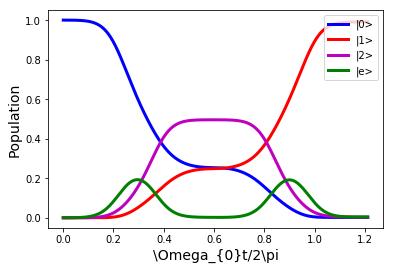

In [14]:
figdic = ['2a', '2b', '2c', '2d', '2e', '2f', '3a', '3b']
option1 = input("Please input the figure you want in the form of, e.g., 2a: ")  
try:
    if option1 == '2a':
        input_method = input('Please select the method you want (Ad, SAd, SAdFixed): ')
        Fig = PulseShape('NOT', input_method)
        Fig.PulseShapePlot()
    elif option1 == '2b':
        pass
    elif option1 == '2c':
        Fig = QFidelity('NOT', 'Msa')
        Fig.ComputeFidelity() 
    elif option1 == '2d': 
        Fig = QFidelity('Hadamard', 'Msa')
        Fig.ComputeFidelity()
    elif option1 == '2e':
        pass
    elif option1 == '2f':
        pass
    elif option1 == '3a':
        pass
    elif option1 == '3b':
        pass
except option1 not in figdic:
        print("Input index of figure not supported!")

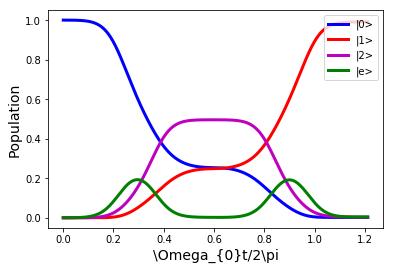

In [8]:
Fig = QFidelity('NOT', 'Msa')
Fig.ComputeFidelity()

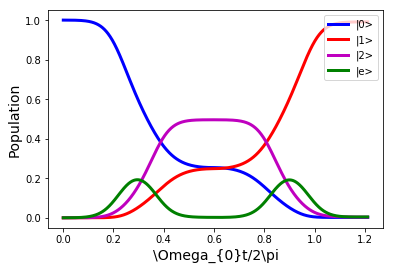

In [9]:
Fig = QFidelity('NOT', 'Satd')
Fig.ComputeFidelity()

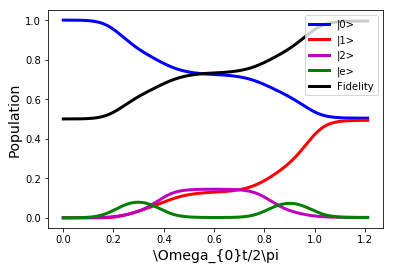

In [10]:
Fig = QFidelity('Hardamard', 'Msa')
Fig.ComputeFidelity()

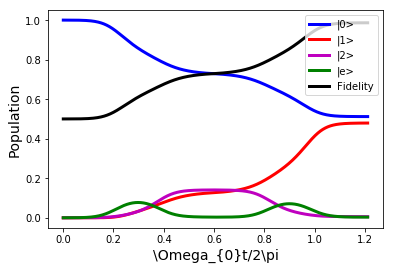

In [11]:
Fig = QFidelity('Hardamard', 'Satd')
Fig.ComputeFidelity()